# INFORMACIÓN DEL PROYECTO

In [2]:
import pandas as pd
import csv
import seaborn as sns
import datetime

import matplotlib.pyplot as plt
%matplotlib inline

### TÍTULO

Turismo postcovid

### TEMA

Voy a analizar la situación del turismo nacional tras la pandemia del covid 

### HIPÓTESIS

Mi principal hipótesis será confirmar que la situación turística ha mejorado en comparación a tiempos antes del covid

## OBTENCIÓN DE LOS DATOS

### DATASETS Y FUENTES ALTERNATIVAS DE DATOS

Para la obtención de los datos me he basado en los datos ofrecidos por el gobierno de España a través de su web: www.datosgob.es (https://datos.gob.es/en/catalogo?q=andalucia&theme_id=turismo&sort=score+desc%2C+metadata_created+desc&page=1) y del Instituto Nacional de Estadística (https://www.ine.es/dynt3/inebase/index.htm?padre=252&capsel=252)

Principales datasets con los que se trabaja:

### KPI: ADR (Average Daily Rate)

In [3]:
ADR = pd.read_csv('../datos/Average_daily_rate.csv', sep=";", encoding='latin-1')
ADR.head()

,Totales Territoriales,Comunidades y Ciudades Autónomas,Provincias,Tipo de dato,Periodo,Total
0,Total Nacional,NaN,NaN,Dato,2022M09,"107,19"
1,Total Nacional,NaN,NaN,Dato,2022M08,"127,63"
2,Total Nacional,NaN,NaN,Dato,2022M07,"121,43"
3,Total Nacional,NaN,NaN,Dato,2022M06,"105,65"
4,Total Nacional,NaN,NaN,Dato,2022M05,"95,26"


### Limpieza de datos

Solo estamos interesados en los totales territoriales. Eliminamos las columnas que no necesitamos.
Convertimos el periodo, que viene en formato categórico 2022M09, en una columna que sea datetime y el total en una columna numérica. Al final, nos quedamos sólo con la fecha y el total territorial.

In [4]:
ADR['Total'] = ADR['Total'].replace(',','.', regex=True)
ADR['Total'] = pd.to_numeric(ADR['Total'],errors='coerce')
ADR['Total'] = ADR['Total'].fillna(0.0)
ADR['year'] = ADR.apply(lambda row: row['Periodo'].split('M')[0], axis=1)
ADR['month'] = ADR.apply(lambda row: row['Periodo'].split('M')[1], axis=1)
ADR['Date'] = ADR.apply(lambda row: datetime.datetime(int(row['year']), int(row['month']), 1), axis=1)
ADR = ADR[['Date', 'Total']]
ADR.head()

,Date,Total
0,2022-09-01,107.19
1,2022-08-01,127.63
2,2022-07-01,121.43
3,2022-06-01,105.65
4,2022-05-01,95.26


### Gráfica con Average daily rate durante el periodo de tiempo analizado

<AxesSubplot:title={'center':'Average daily rate'}, xlabel='Date', ylabel='Total'>

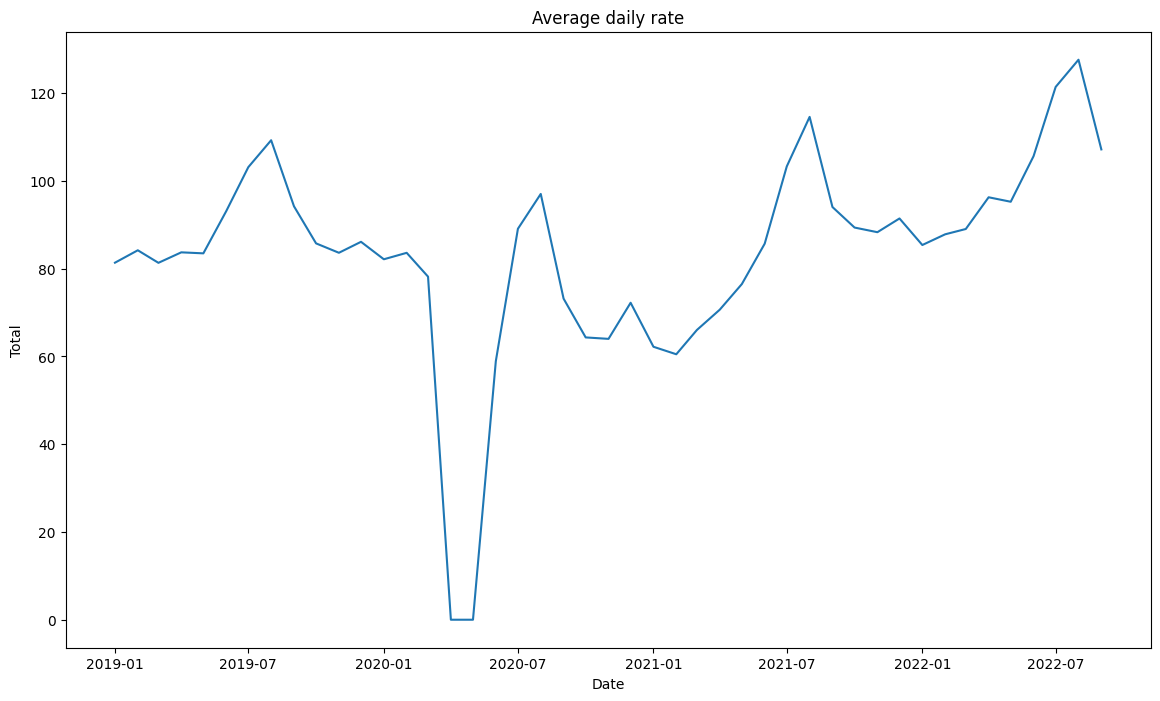

In [5]:
plt.figure(figsize=(14,8))
plt.title("Average daily rate")
sns.lineplot(x=ADR["Date"], y=ADR["Total"])

### KPI: RevPar (Revenue Per Available Room)

In [6]:
RevPar=pd.read_csv('../datos/RevPar.csv', sep=";",encoding='latin-1')
RevPar.head()

,Categoría: Nivel 1,Categoría: Nivel 2,Tipo de dato,Periodo,Total
0,Total categorías,NaN,Dato,2022M09,"78,90"
1,Total categorías,NaN,Dato,2022M08,"101,58"
2,Total categorías,NaN,Dato,2022M07,"89,90"
3,Total categorías,NaN,Dato,2022M06,"74,22"
4,Total categorías,NaN,Dato,2022M05,"60,91"


### Limpieza de datos

Solo estamos interesados en los totales territoriales. Eliminamos las columnas que no necesitamos.
Convertimos el periodo, que viene en formato categórico 2022M09, en una columna que sea datetime y el total en una columna numérica. Al final, nos quedamos sólo con la fecha y el total territorial.

In [7]:
RevPar['Total'] = RevPar['Total'].replace(',','.', regex=True)
RevPar['Total'] = pd.to_numeric(RevPar['Total'],errors='coerce')
RevPar['Total'] = RevPar['Total'].fillna(0.0)
RevPar['year'] = RevPar.apply(lambda row: row['Periodo'].split('M')[0], axis=1)
RevPar['month'] = RevPar.apply(lambda row: row['Periodo'].split('M')[1], axis=1)
RevPar['Date'] = RevPar.apply(lambda row: datetime.datetime(int(row['year']), int(row['month']), 1), axis=1)
RevPar = RevPar[['Date', 'Total']]
RevPar.head()

,Date,Total
0,2022-09-01,78.90
1,2022-08-01,101.58
2,2022-07-01,89.90
3,2022-06-01,74.22
4,2022-05-01,60.91


### Gráfica con RevPar durante el periodo de tiempo analizado

<AxesSubplot:title={'center':'Revenue per available room'}, xlabel='Date', ylabel='Total'>

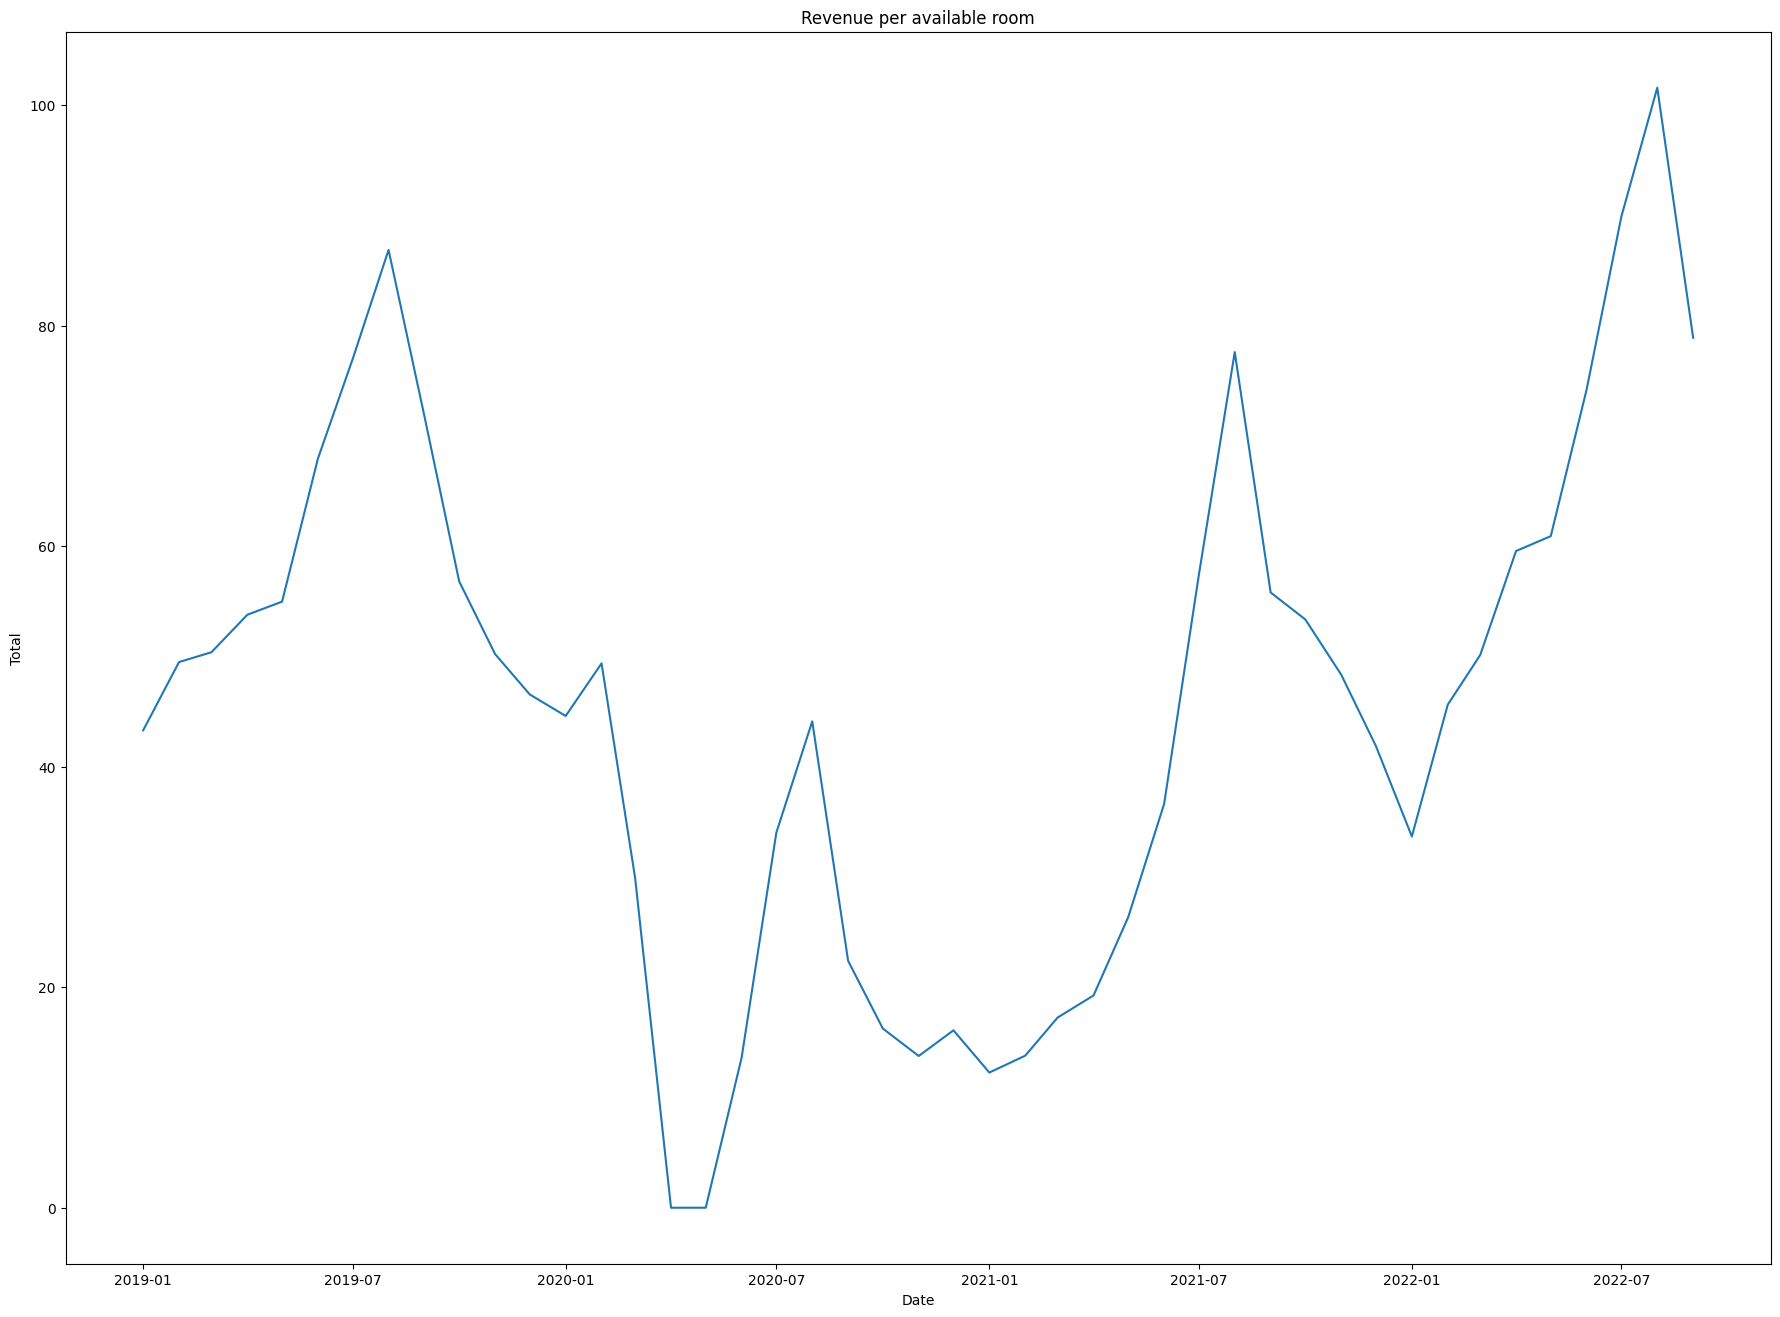

In [8]:
plt.figure(figsize=(22,16))
plt.title("Revenue per available room")
sns.lineplot(x=RevPar["Date"], y=RevPar["Total"])

### KPI: Average stay 

In [9]:
Average_stay=pd.read_csv('../datos/Average_stay.csv',sep=";")
Average_stay.head()

,Zonas Turísticas,Periodo,Total
0,Andalucía: Costa De Almería,2022M08,"5,74"
1,Andalucía: Costa De Almería,2022M07,"4,82"
2,Andalucía: Costa De Almería,2022M06,"4,01"
3,Andalucía: Costa De Almería,2022M05,"2,09"
4,Andalucía: Costa De Almería,2022M04,"3,17"


### Limpieza de datos

En esta ocasión mostramos los datos desglosados por zonas turísticas. 
Convertimos el periodo, que viene en formato categórico 2022M09, en una columna que sea datetime y el total en una columna numérica. Al final, nos quedamos sólo con la fecha y el total territorial.

In [10]:
Average_stay['Total'] = Average_stay['Total'].replace(',','.', regex=True)
Average_stay['Total'] = pd.to_numeric(Average_stay['Total'],errors='coerce')
Average_stay['Total'] = Average_stay['Total'].fillna(0.0)
Average_stay['year'] = Average_stay.apply(lambda row: row['Periodo'].split('M')[0], axis=1)
Average_stay['month'] = Average_stay.apply(lambda row: row['Periodo'].split('M')[1], axis=1)
Average_stay['Date'] = Average_stay.apply(lambda row: datetime.datetime(int(row['year']), int(row['month']), 1), axis=1)
Average_stay['Zona'] = Average_stay["Zonas  Turísticas"]
Average_stay=Average_stay[["Zona","Date", "Total"]]
Average_stay.head()

,Zona,Date,Total
0,Andalucía: Costa De Almería,2022-08-01,5.74
1,Andalucía: Costa De Almería,2022-07-01,4.82
2,Andalucía: Costa De Almería,2022-06-01,4.01
3,Andalucía: Costa De Almería,2022-05-01,2.09
4,Andalucía: Costa De Almería,2022-04-01,3.17


### Gráfica con Average stay durante el periodo de tiempo analizado

<AxesSubplot:title={'center':'Average stay by tourist'}, xlabel='Date', ylabel='Total'>

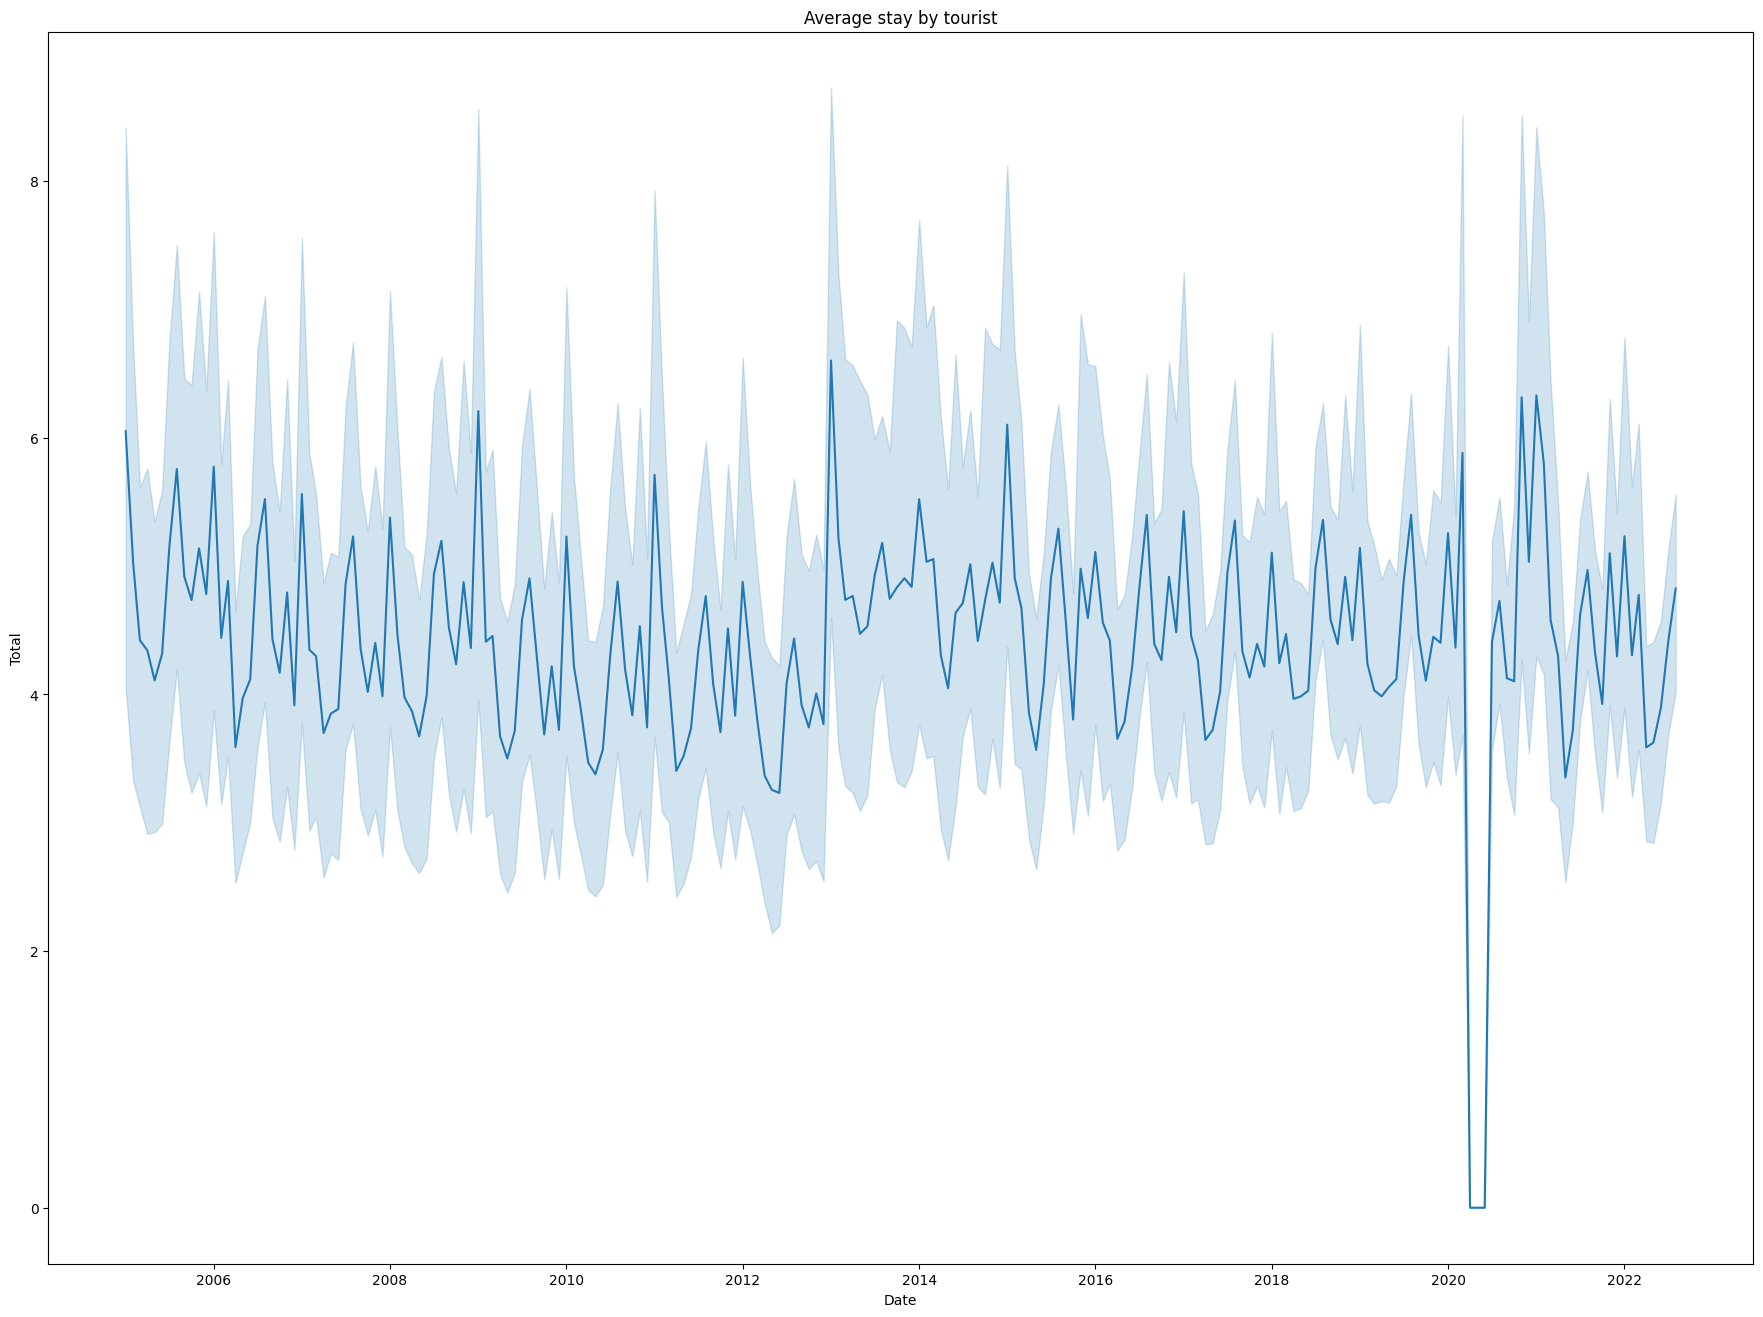

In [12]:
plt.figure(figsize=(22,16))
plt.title("Average stay by tourist")
sns.lineplot(x=Average_stay["Date"], y=Average_stay["Total"])

### KPI: Estimated beds

In [13]:
Estimated_beds=pd.read_csv('../datos/Estimated_bed_places.csv',sep=";")
Estimated_beds.head()

,Zonas Turísticas,Apartamentos y personal empleado,Periodo,Total
0,Andalucía: Costa De Almería,Número de plazas estimadas,2022M08,12.369
1,Andalucía: Costa De Almería,Número de plazas estimadas,2022M07,12.386
2,Andalucía: Costa De Almería,Número de plazas estimadas,2022M06,11.532
3,Andalucía: Costa De Almería,Número de plazas estimadas,2022M05,10.752
4,Andalucía: Costa De Almería,Número de plazas estimadas,2022M04,9.634


### Limpieza de datos

En esta ocasión, al igual que con el KPI anterior, mostramos los datos desglosados por zonas turísticas. 
Convertimos el periodo, que viene en formato categórico 2022M09, en una columna que sea datetime y el total en una columna numérica. Al final, nos quedamos sólo con la fecha y el total territorial.

In [14]:
Estimated_beds['Total'] = Estimated_beds['Total'].replace(',','.', regex=True)
Estimated_beds['Total'] = pd.to_numeric(Estimated_beds['Total'],errors='coerce')
Estimated_beds['Total'] = Estimated_beds['Total'].fillna(0.0)
Estimated_beds['year'] = Estimated_beds.apply(lambda row: row['Periodo'].split('M')[0], axis=1)
Estimated_beds['month'] = Estimated_beds.apply(lambda row: row['Periodo'].split('M')[1], axis=1)
Estimated_beds['Date'] = Estimated_beds.apply(lambda row: datetime.datetime(int(row['year']), int(row['month']), 1), axis=1)
Estimated_beds['Zona'] = Estimated_beds["Zonas  Turísticas"]
Estimated_beds=Estimated_beds[["Zona","Date", "Total"]]
Estimated_beds.head()

,Zona,Date,Total
0,Andalucía: Costa De Almería,2022-08-01,12.369
1,Andalucía: Costa De Almería,2022-07-01,12.386
2,Andalucía: Costa De Almería,2022-06-01,11.532
3,Andalucía: Costa De Almería,2022-05-01,10.752
4,Andalucía: Costa De Almería,2022-04-01,9.634


### Gráfica con Estimated beds durante el periodo de tiempo analizado

<AxesSubplot:title={'center':'Number of estimated bed-places'}, xlabel='Date', ylabel='Total'>

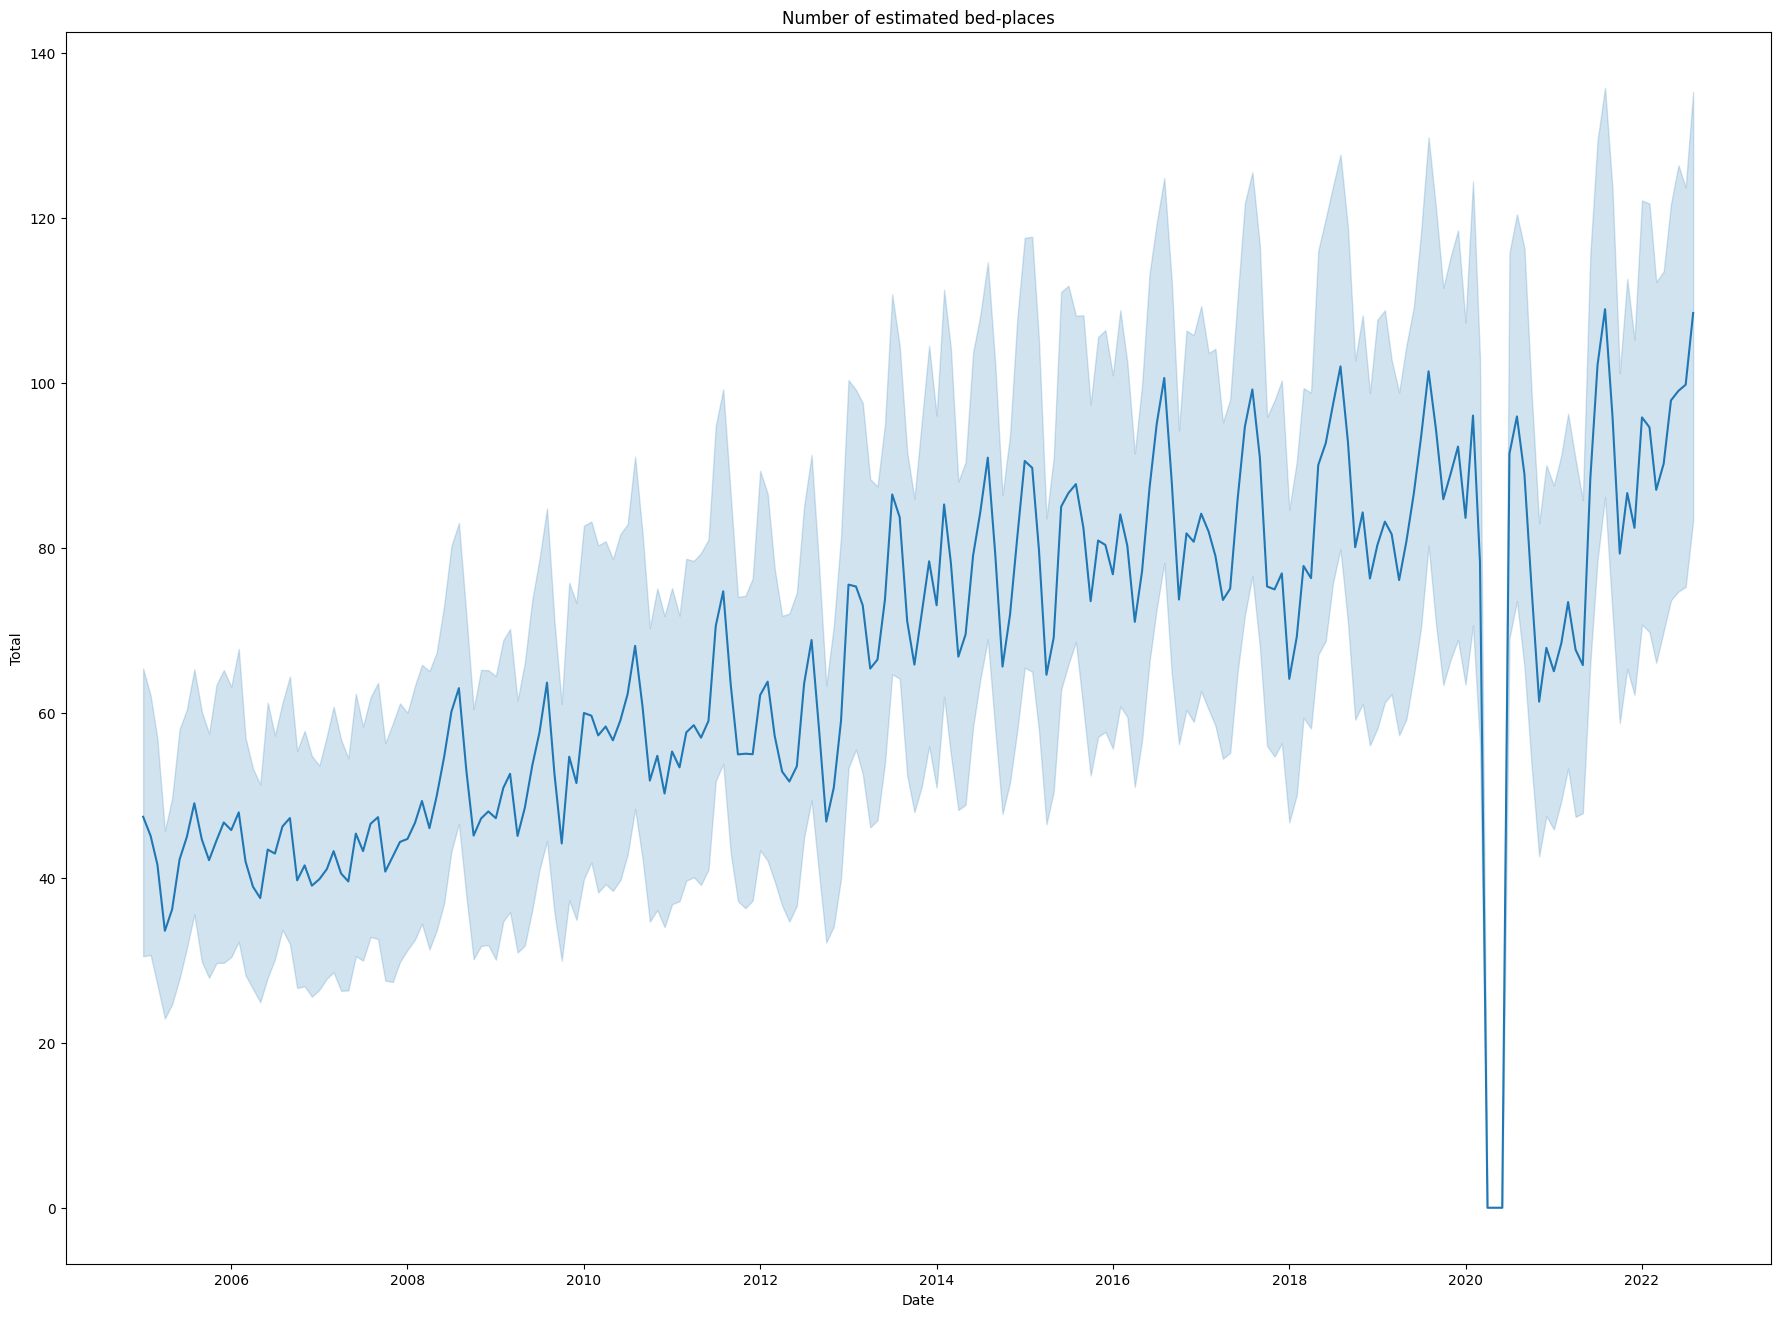

In [15]:
plt.figure(figsize=(22,16))
plt.title("Number of estimated bed-places")
sns.lineplot(x=Estimated_beds["Date"], y=Estimated_beds["Total"])